<a href="https://colab.research.google.com/github/mattjacobs23/IntroML/blob/main/introML/_2_Jacobs_Fall2020_CS146_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matthew Jacobs

UID: 504580408

Assignment #1


In [ ]:
import sys

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Please append your own directory after ‘/content/drive/My Drive/'
# where you have nutil.py and adult_subsample.csv
### ========== TODO : START ========== ###
# for example: sys.path += ['/content/drive/My Drive/Fall2020-CS146-HW1'] 
sys.path += ['/content/drive/My Drive/Fall2020-CS146-HW1'] 
### ========== TODO : END ========== ###


In [ ]:
##import matplotlib.pyplot as plt
#import numpy as np

#data = np.loadtxt('/content/drive/My Drive/Fall2020-CS146-HW1/adult_subsample.csv', delimiter=',')
#workclass = data[:,0] 
#plt.hist(samples, bins = 5)

In [ ]:
from nutil import *

In [ ]:
# Use only the provided packages!
import math
import csv
import numpy as np
import matplotlib.pyplot as plt


from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [ ]:
######################################################################
# Immutatble classes
######################################################################

class Classifier(object) :
    """
    Classifier interface.
    """

    def fit(self, X, y):
        raise NotImplementedError()

    def predict(self, X):
        raise NotImplementedError()


class MajorityVoteClassifier(Classifier) :

    def __init__(self) :
        """
        A classifier that always predicts the majority class.

        Attributes
        --------------------
            prediction_ -- majority class
        """
        self.prediction_ = None

    def fit(self, X, y) :
        """
        Build a majority vote classifier from the training set (X, y).

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes

        Returns
        --------------------
            self -- an instance of self
        """
        majority_val = Counter(y).most_common(1)[0][0] # will just return [(most common element, count)]
        self.prediction_ = majority_val               # we dont care what the count is, just return most common element [0][0]
        return self
                #c.most_common()[:-n-1:-1]       # n least common elements

    def predict(self, X) :
        """
        Predict class values.

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples

        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.prediction_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")

        n,d = X.shape
        y = [self.prediction_] * n #just generates an array of size n all with majority pediction
        return y



In [ ]:
######################################################################
# Mutatble classes
######################################################################

class RandomClassifier(Classifier) :

    def __init__(self) :
        """
        A classifier that predicts according to the distribution of the classes.

        Attributes
        --------------------
            probabilities_ -- class distribution dict (key = class, val = probability of class)
        """
        self.probabilities_ = None

    def fit(self, X, y) :
        """
        Build a random classifier from the training set (X, y).

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes

        Returns
        --------------------
            self -- an instance of self
        """

        ### ========== TODO : START ========== ###
        # part b: set self.probabilities_ according to the training set
        # predicts a target class according to the distribution of classes in the training data set.
        # For example, if 85% of the examples in the training set have >50k = 0 and 15% have >50k = 1,
        # then, when applied to a test set, RandomClassifier should randomly predict 85% of the examples
        # as >50k = 0 and 15% as >50k = 1.
        # randomly select value from y would give 1 exactly at the frequency it appears in the test data 
        counts = Counter(y).most_common(2)
        Most_prob = counts[0]
        Least_prob = counts[1]
        #print(Most_prob[1])
        if Most_prob[0] == 1:
          count_1 = Most_prob[1]
        else:
          count_1 = Least_prob[1]

        prob_1 = count_1 / len(y)
        prob_0 = 1 - prob_1
        self.probabilities_ = [prob_0, prob_1]

        #self.probabilities_ = #random classifier 

        ### ========== TODO : END ========== ###

        return self

    def predict(self, X, seed=1234) :
        """
        Predict class values.

        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            seed -- integer, random seed

        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.probabilities_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")
        np.random.seed(seed)

        ### ========== TODO : START ========== ###
        # part b: predict the class for each test example
        # hint: use np.random.choice (be careful of the parameters)
        #now we need to for each X predict at random the output, make this into an array of predicted outputs y
        # numpy.random.choice(a, size=None, replace=True, p=None) p is probabilities of each value
        n,d = X.shape  #this allows us to extract the shape of the particular X being used, n being the top level how many examples we have
        y = np.random.choice(2, n, p = self.probabilities_)  #this will create an array of size n filled with 1's and 0's (for the two classes), the frequency of each corresponding to the frequency at which they appear in the training data.
        
        ### ========== TODO : END ========== ###

        return y


In [ ]:
######################################################################
# Immutatble functions
######################################################################

def plot_histograms(X, y, Xnames, yname) :
    n,d = X.shape  # n = number of examples, d =  number of features
    fig = plt.figure(figsize=(20,15))
    ncol = 3
    nrow = d // ncol + 1
    for i in range(d) :
        fig.add_subplot (nrow,ncol,i+1)
        data, bins, align, labels = plot_histogram(X[:,i], y, Xname=Xnames[i], yname=yname, show = False)
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xnames[i])
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')

    plt.savefig ('histograms.pdf')


def plot_histogram(X, y, Xname, yname, show = True) :
    """
    Plots histogram of values in X grouped by y.

    Parameters
    --------------------
        X     -- numpy array of shape (n,d), feature values
        y     -- numpy array of shape (n,), target classes
        Xname -- string, name of feature
        yname -- string, name of target
    """

    # set up data for plotting
    targets = sorted(set(y))
    data = []; labels = []
    for target in targets :
        features = [X[i] for i in range(len(y)) if y[i] == target]
        data.append(features)
        labels.append('%s = %s' % (yname, target))

    # set up histogram bins
    features = set(X)
    nfeatures = len(features)
    test_range = list(range(int(math.floor(min(features))), int(math.ceil(max(features)))+1))
    if nfeatures < 10 and sorted(features) == test_range:
        bins = test_range + [test_range[-1] + 1] # add last bin
        align = 'left'
    else :
        bins = 10
        align = 'mid'

    # plot
    if show == True:
        plt.figure()
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xname)
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')
        plt.show()

    return data, bins, align, labels


In [ ]:
######################################################################
# Mutatble functions
######################################################################

def error(clf, X, y, ntrials=100, test_size=0.2) :   #test size is 20%, so 80% is training.
    """
    Computes the classifier error over a random split of the data,
    averaged over ntrials runs.    #so we randomly split the data, compute the classifier error 100 times and find the average

    Parameters
    --------------------
        clf         -- classifier
        X           -- numpy array of shape (n,d), features values
        y           -- numpy array of shape (n,), target classes
        ntrials     -- integer, number of trials

    Returns
    --------------------
        train_error -- float, training error
        test_error  -- float, test error
        f1_score    -- float, test "micro" averaged f1 score
    """

    ### ========== TODO : START ========== ###
    # compute cross-validation error using StratifiedShuffleSplit over ntrials
    # hint: use train_test_split (be careful of the parameters). This splits arrays or matrices into random !!!! train and test subsets.
    # sklearn.model_selection.train_test_split(*arrays, **options) -> we imported as :
    #from sklearn.model_selection import cross_val_score
    #from sklearn.model_selection import StratifiedShuffleSplit
    #Implement the missing portions of error(...) according to the provided specifications. 
    #You may find it helpful to use StratifiedShuffleSplit(...) from scikit-learn. To ensure that we always get the same splits across 
    #different runs (and thus can compare the classifier results), set the random_state parameter to be the same (e.g., 0).
   # Next, use your error(...) function to evaluate the training error and (cross-validation) test error and test micro averaged F1 Score
    # (If you dont know what is F1, please click here) of each of your four models (for the KNeighborsClassifier, use k=5). 
    # GOAL: To do this, generate a random 80/20 split of the training data, train each model on the 80% fraction, evaluate the error on
    #  either the 80% or the 20% fraction, and repeat this 100 times to get an average result. What are the average training and test error
    #   of each of your classifiers on the adult subsample data set?
   
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0) #This randomly splits the data into training 80% and testing 20%
    #does error on the training mean the "test" portion split from the 80% fraction, and then error on test is on the 20% testing data?
    sss = StratifiedShuffleSplit(n_splits=ntrials, test_size=test_size, random_state=0) #keep random_state consistent with before
    #this n_splits should be equal to ntrials = 100. it is the number of times we want to split
    #test_size = 0.2 makes sure we have a 80/20 split of training data. 
    #want to train the model on the 80% fraction. evaluate error on the 80% and 20% fraction. 

    accuracy_list_train = []
    accuracy_list_test = [] #initialize the arrays [] to later take averages with
    f1_list = []

    for train_index, test_index in sss.split(X, y):   #This splits the main X and y into train and test, will happen 100 times. 
        X_train_new, X_val = X[train_index], X[test_index] #so X_train_new will be the 80% fraction, X_val will be the 20% fraction. 
        Y_train_new, Y_val = y[train_index], y[test_index] #Y_train_new will be the corresponding labels for the 80% fraction. Y_val for the 20%
        # The classifier clf will be specified by the user
        clf.fit(X_train_new, Y_train_new) #create our fit on the 80% fraction.
        predictions_test = clf.predict(X_val)  #running predictions on the development part of training data for this iteration 
        predictions_train = clf.predict(X_train_new)  #running predictions on the 20% unseen test data.
        f1 = metrics.f1_score(Y_val, predictions_test, average = 'micro') #test micro averaged F1 Score being calculated from the predictions on the test 20% fraction
        f1_list.append(f1)
        accuracy_test = metrics.accuracy_score(Y_val, predictions_test)  #outputs single accuracy value, in this case for evaluation on the 20% fraction
        accuracy_list_test.append(accuracy_test)
        accuracy_train = metrics.accuracy_score(Y_train_new, predictions_train)  #accuracy on the 80% fraction
        accuracy_list_train.append(accuracy_train)

    accuracy_train_avg = float(sum(accuracy_list_train)) / ntrials
    train_error = 1 - accuracy_train_avg
    accuracy_test_avg = float(sum(accuracy_list_test)) / ntrials
    test_error = 1 - accuracy_test_avg
    f1_score = np.mean(f1_list) 
   
    ### ========== TODO : END ========== ###

    return train_error, test_error, f1_score  #training error, cross-validation error, and f1_score returned




In [ ]:
######################################################################
# Immutatble functions
######################################################################


def write_predictions(y_pred, filename, yname=None) :
    """Write out predictions to csv file."""
    out = open(filename, 'wb')
    f = csv.writer(out)
    if yname :
        f.writerow([yname])
    f.writerows(list(zip(y_pred)))
    out.close()


Plotting...
Classifying using Majority Vote...
	-- training error: 0.240
Classifying using Random...
	-- training error: 0.374
Classifying using Decision Tree...
	-- training error: 0.000
Classifying using k-Nearest Neighbors...
	-- training error with k=3: 0.153
	-- training error with k=5: 0.195
	-- training error with k=7: 0.213
Investigating various classifiers...
	For Majority Vote Classifier: 
	-- training error: 0.240
	-- test error: 0.240
	-- F1 score: 0.760
	For Random Classifier: 
	-- training error: 0.375
	-- test error: 0.382
	-- F1 score: 0.618
	For Decision Tree Classifier: 
	-- training error: 0.000
	-- test error: 0.209
	-- F1 score: 0.791
	For K Nearest Neighbors Classifier (k=5): 
	-- training error: 0.202
	-- test error: 0.259
	-- F1 score: 0.741
Finding the best k...
	The best value of k is: 12
	This k has an error of: 0.2360000000000001


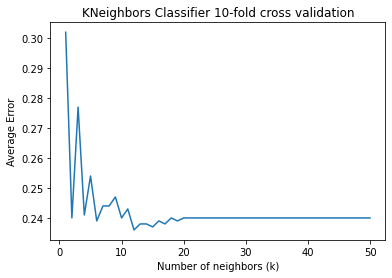

Investigating depths...
	The best depth limit on the training set: 20
	The best depth limit on the test set: 5


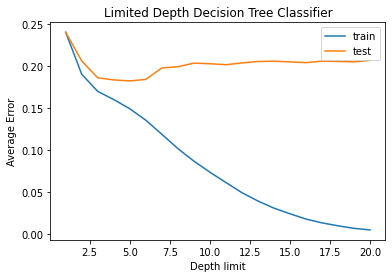

Investigating various learning curves...


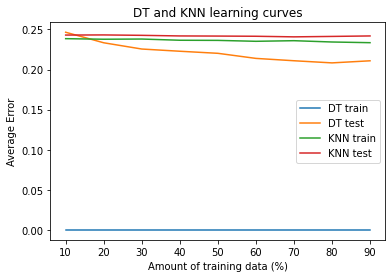

Done


In [ ]:

######################################################################
# main
######################################################################

def main():
    
    
    
    # load adult_subsample dataset with correct file path
    ### ========== TODO : START ========== ###
    data_file =  "/content/drive/My Drive/Fall2020-CS146-HW1/adult_subsample.csv"
    ### ========== TODO : END ========== ###
    



    data = load_data(data_file, header=1, predict_col=-1)

    X = data.X; Xnames = data.Xnames
    y = data.y; yname = data.yname
    n,d = X.shape  # n = number of examples, d =  number of features

    

    plt.figure()
    #========================================
    # part a: plot histograms of each feature
    print('Plotting...')
   # plot_histograms (X, y, Xnames=Xnames, yname=yname)
    




    ### ========== TODO : START ========== ###
    # part i: Preprocess X (e.g., normalize)
    '''
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.fit_transform(X) #X_train_normalized
    '''
    ### ========== TODO : END ========== ###




    #========================================
    # train Majority Vote classifier on data
    print('Classifying using Majority Vote...')
    clf = MajorityVoteClassifier() # create MajorityVote classifier, which includes all model parameters
    clf.fit(X, y)                  # fit training data using the classifier. *Note we do not have to include the self argument !!
    y_pred = clf.predict(X)        # take the classifier and run it on the training data
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)





    ### ========== TODO : START ========== ###
    # part b: evaluate training error of Random classifier
    print('Classifying using Random...')
    clf = RandomClassifier()
    clf.fit(X, y)
    y_pred = clf.predict(X)
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)

    ### ========== TODO : END ========== ###





    ### ========== TODO : START ========== ###
    # part c: evaluate training error of Decision Tree classifier
    
    print('Classifying using Decision Tree...')
    clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
    clf.fit(X, y)
    y_pred = clf.predict(X)
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error: %.3f' % train_error)

    ### ========== TODO : END ========== ###






    ### ========== TODO : START ========== ###
    # part d: evaluate training error of k-Nearest Neighbors classifier
    # use k = 3, 5, 7 for n_neighbors
    print('Classifying using k-Nearest Neighbors...')
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error with k=3: %.3f' % train_error)
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error with k=5: %.3f' % train_error)
    clf = KNeighborsClassifier(n_neighbors=7)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print('\t-- training error with k=7: %.3f' % train_error)
    
    ### ========== TODO : END ========== ###





    ### ========== TODO : START ========== ###
    # part e: use cross-validation to compute average training and test error of classifiers
    # error(clf, X, y, ntrials=100, test_size=0.2), returns train_error, test_error, f1_score 
    print('Investigating various classifiers...') 
    
    #MajorityVote
    MV = error(MajorityVoteClassifier(), X, y, ntrials=100, test_size=0.2)
    print("\tFor Majority Vote Classifier: ")
    print('\t-- training error: %.3f' % MV[0])
    print('\t-- test error: %.3f' % MV[1])
    print('\t-- F1 score: %.3f' % MV[2])
    #RandomClassifier
    RC = error(RandomClassifier(), X, y, ntrials=100, test_size=0.2)
    print("\tFor Random Classifier: ")
    print('\t-- training error: %.3f' % RC[0])
    print('\t-- test error: %.3f' % RC[1])
    print('\t-- F1 score: %.3f' % RC[2])
    #Decision Tree
    DT = error(DecisionTreeClassifier(), X, y, ntrials=100, test_size=0.2)
    print("\tFor Decision Tree Classifier: ")
    print('\t-- training error: %.3f' % DT[0])
    print('\t-- test error: %.3f' % DT[1])
    print('\t-- F1 score: %.3f' % DT[2])

    #KNN k = 5
    KNN = error(KNeighborsClassifier(), X, y, ntrials=100, test_size=0.2)
    print("\tFor K Nearest Neighbors Classifier (k=5): ")
    print('\t-- training error: %.3f' % KNN[0])
    print('\t-- test error: %.3f' % KNN[1])
    print('\t-- F1 score: %.3f' % KNN[2])

    
    ### ========== TODO : END ========== ###





    ### ========== TODO : START ========== ###
    # part f: use 10-fold cross-validation to find the best value of k for k-Nearest Neighbors classifier
    # Find out the best value of k using 10-fold cross validation. You may find the cross_val_score(...) from scikit-learn helpful.
    # Run 10-fold cross validation for all odd numbers ranging from 1 to 50 as the number of neighbors. 
    # Then plot the validation error against the number of neighbors, k. 
    # Include this plot in your writeup, and provide a 1-2 sentence description of your observations. What is the best value of k?
    print('Finding the best k...')
    avg_err_list = []
    for n in range(1, 51):
      clf = KNeighborsClassifier(n_neighbors=n) #we will be doing KNN with 1-50 neighbors
      acc_list = cross_val_score(clf, X, y, cv=10) #setting cv=10 does 10-fold cross validation. Output array will be length 10 accuracy values
      acc_avg = sum(acc_list) / 10.0
      avg_error = 1 - acc_avg
      avg_err_list.append(avg_error)
    
    
    #now have a list of the average accuracies for n=1-50 KNN classifiers. 
    k_list = list(range(1,51))
    min_error = avg_err_list.index(min(avg_err_list))
    Best_k = k_list[min_error]
    print("\tThe best value of k is:", Best_k) 
    print("\tThis k has an error of:", min(avg_err_list))
    plt.plot(k_list, avg_err_list)
    plt.xlabel("Number of neighbors (k)")
    plt.ylabel("Average Error")
    plt.title("KNeighbors Classifier 10-fold cross validation")
    plt.show()


    ### ========== TODO : END ========== ###





    ### ========== TODO : START ========== ###
    # part g: investigate decision tree classifier with various depths
    
    print('Investigating depths...') #Me: have to use Max_depth here apparently
    DT_error_train = []
    DT_error_test = []
    for d in range(1, 21):  #going through these various depth limits
      clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth = d) #max_depth now specified to limit the search depth. 
      DT = error(clf, X, y, ntrials=100, test_size=0.2) #run cross validation
      DT_error_train.append(DT[0])
      DT_error_test.append(DT[1])
    
    d_list = list(range(1, 21))
    min_error_train = DT_error_train.index(min(DT_error_train))
    min_error_test = DT_error_test.index(min(DT_error_test))
    Best_d_train = d_list[min_error_train]
    Best_d_test = d_list[min_error_test]
    print("\tThe best depth limit on the training set:", Best_d_train) 
    print("\tThe best depth limit on the test set:", Best_d_test)
    plt.plot(d_list, DT_error_train, label = "train")
    plt.plot(d_list, DT_error_test, label = "test")
    plt.xlabel("Depth limit")
    plt.ylabel("Average Error")
    plt.title("Limited Depth Decision Tree Classifier")
    plt.legend()
    plt.show()


    ### ========== TODO : END ========== ###





    ### ========== TODO : START ========== ### 
    # part h: investigate decision tree and k-Nearest Neighbors classifier with various training set sizes
    print("Investigating various learning curves...")
    # For this experiment, first generate a random 90/10 split of the training data and do the following experiments considering
    # the 90% fraction as training and 10% for testing.
    # Run experiments for the decision tree and k-nearest neighbors classifier with the best depth limit and k value you found above.
    # This time, vary the amount of training data by starting with splits of 0.10 (10% of the data from 90% fraction) and working up to 
    # full size 1.00 (100% of the data from 90% fraction) in increments of 0.10. Then plot the decision tree and k-nearest neighbors 
    # training and test error against the amount of training data
    # error(clf, X, y, ntrials=100, test_size=0.2) has inside of it sss = StratifiedShuffleSplit(n_splits=ntrials, test_size=test_size, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0) #Split the data 90% training, 10% testing
    
    DT_list_train = []
    DT_list_test = []
    KNN_list_train = []
    KNN_list_test = []
    #want to vary the amount of TRAINING data from 10% (test_size = 0.9) to 100% (test_size = 0)
    for test_size in (np.linspace(1,9,9) / 10.0):
      clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth = Best_d_test )
      DT = error(DecisionTreeClassifier(), X, y, ntrials=100, test_size=test_size)
      clf_KNN = KNeighborsClassifier(n_neighbors=Best_k)
      KNN = error(clf_KNN, X, y, ntrials=100, test_size=test_size)
      DT_list_train.append(DT[0])
      DT_list_test.append(DT[1])
      KNN_list_train.append(KNN[0])
      KNN_list_test.append(KNN[1])

    #Want to plot DT and KNN training and test error as function of amount of training data
    amount_train = np.linspace(90,10,9) #in 
    plt.plot(amount_train, DT_list_train, label = "DT train")
    plt.plot(amount_train, DT_list_test, label = "DT test")
    plt.plot(amount_train, KNN_list_train, label = "KNN train")
    plt.plot(amount_train, KNN_list_test, label = "KNN test")
    plt.xlabel("Amount of training data (%)")
    plt.ylabel("Average Error")
    plt.title("DT and KNN learning curves")
    plt.legend()
    plt.show()
    
    ### ========== TODO : END ========== ###



    print('Done')


if __name__ == "__main__":
    main()


In [ ]:
print(Best_d_test)

- Workclass: workclass value of 1 dominates, namely with incomes >50k. For most of the workclass values, >50k is more common or equally common as <50k. 

- Education: lower values more priminant, again dominated by >50k for every value of education.

- Merital status: 3 is extremely dominated by >50k, merital status value 1 is more even between class. Again >50k always holds the greater proportion. 

- Occupation: Only occupation level 5 has more <50k. Occupation values 5 and 6 more equally balanced, 0-4 completely dominated by >50k. 

- Relationship: More values near the center, roughly equal class wise for relationship value of 3. But next to that dominated by >50k. 

- Race: Most values at 1, which is dominated by >50k. 

- Native country: Most values at 1, which is dominated by >50k. 

- Age: Younger participants have the majority of >50k. <50k follows a sort of Gaussian around age 45 with std about 15. 

- fnlwgt: Both >50k and <50k have ~gaussian distributions about 0.2. 

- Education nums: >50k concentrated about 9-10. <50k tends to increase after value 9.

- Capital gain: Most values about 2500, dominated by >50k. 

- Capital loss: Most values about 100, dominated by >50k. 

- Hours-per-week: Distribution of >50k peaked at 35 hours per week. <50k falling off after this point. 

- Sex: Sex 0 has about double the frequency of >50k. Sex 1 is more highly dominated by >50k. 